<a href="https://colab.research.google.com/github/EsraaMosaad/ASDC-AI-Data-analysis-internship/blob/main/Task_2_102_Category_Flower_Dataset_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import argmax
import cv2
import os
import glob
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

In [8]:
import warnings
warnings.filterwarnings('ignore')

# **Load dataset**

In [9]:
!tar -xvzf /content/drive/MyDrive/Dataset/102flowers.tgz

Streaming output truncated to the last 5000 lines.
jpg/image_02266.jpg
jpg/image_00062.jpg
jpg/image_05821.jpg
jpg/image_03712.jpg
jpg/image_01142.jpg
jpg/image_03033.jpg
jpg/image_05760.jpg
jpg/image_02732.jpg
jpg/image_00183.jpg
jpg/image_05264.jpg
jpg/image_03778.jpg
jpg/image_07061.jpg
jpg/image_04468.jpg
jpg/image_00676.jpg
jpg/image_07610.jpg
jpg/image_02192.jpg
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01517.jpg
jpg/image

**The size of the iamge is not the same so i we are going to resize all the image with the same size.**

In [10]:
file = '/content/jpg/*'
dim = (200, 200)

def resize_image(image_path):
    return cv2.resize(cv2.imread(image_path), dim, interpolation=cv2.INTER_AREA)

image_paths = glob.glob(file)
# data_images = [cv2.imread(image_path) for image_path in image_paths]
data_images = [resize_image(image) for image in image_paths[0:4000]]

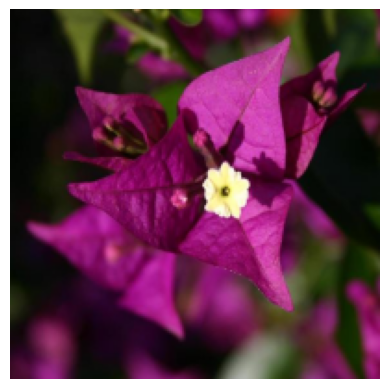

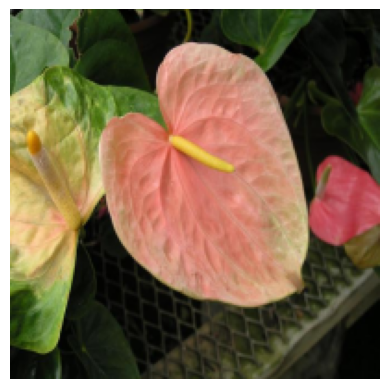

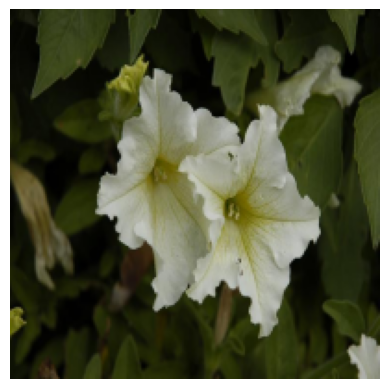

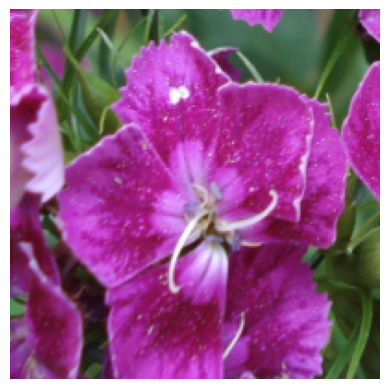

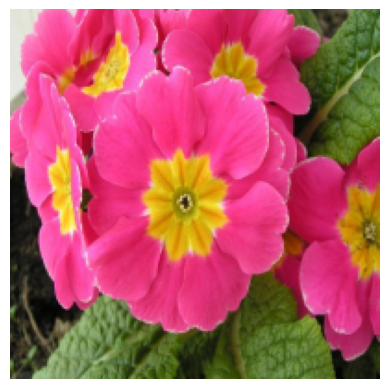

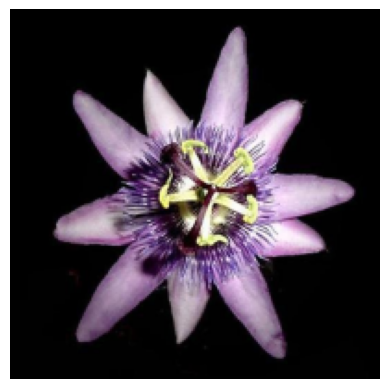

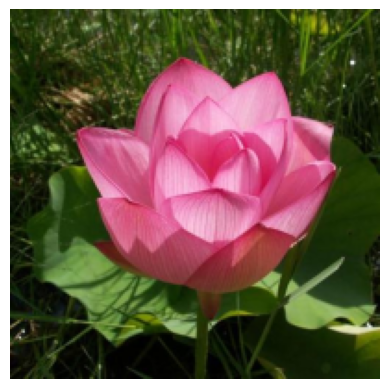

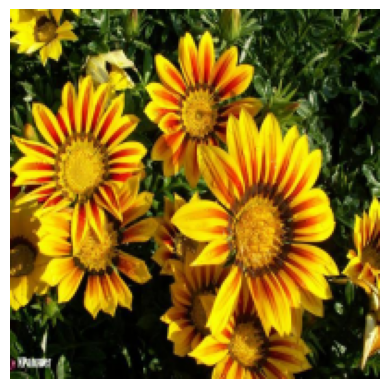

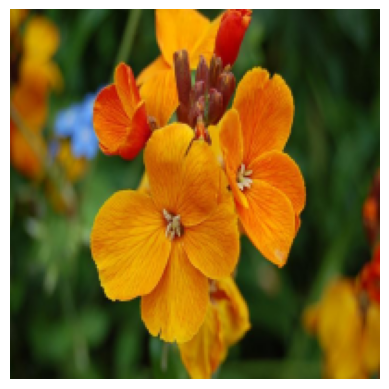

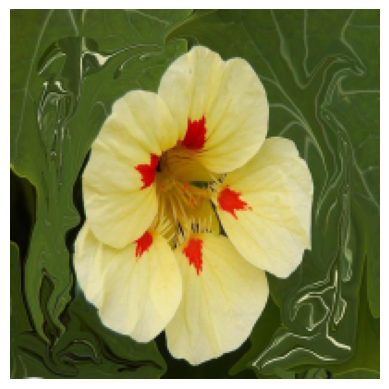

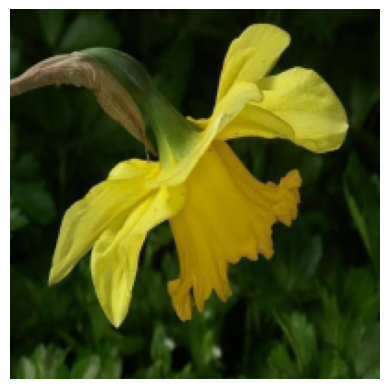

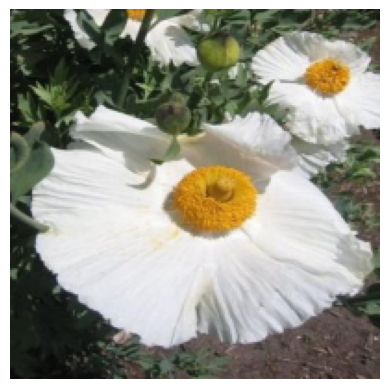

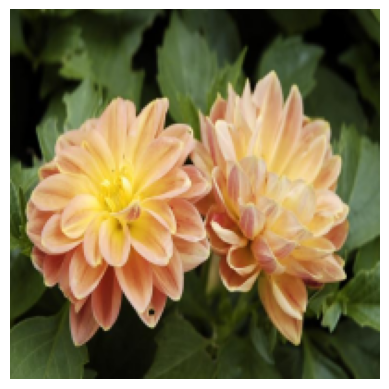

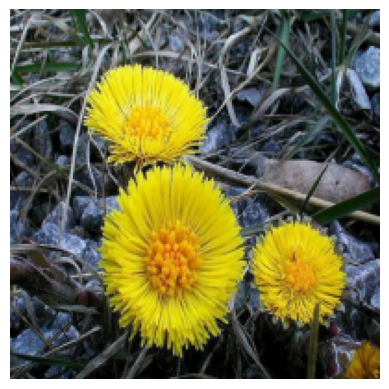

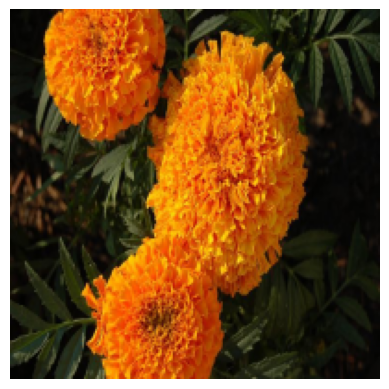

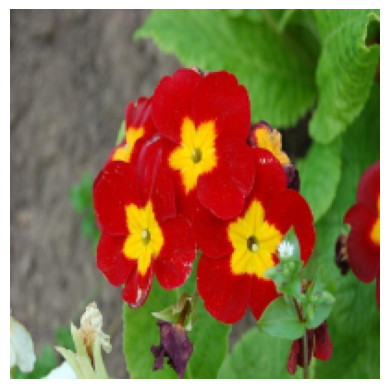

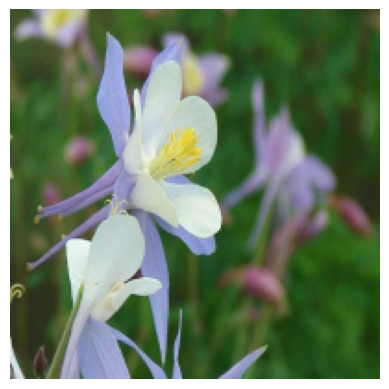

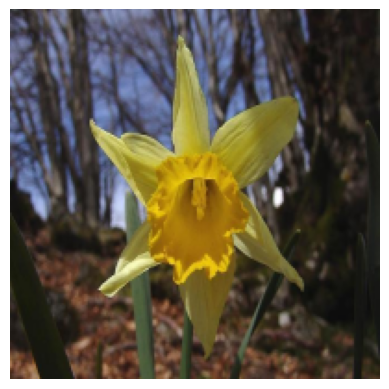

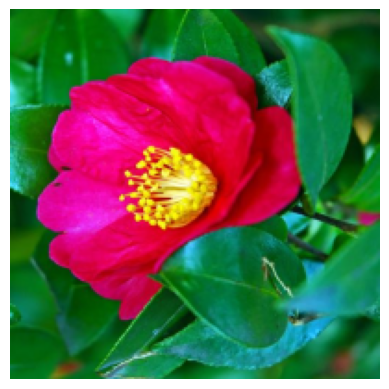

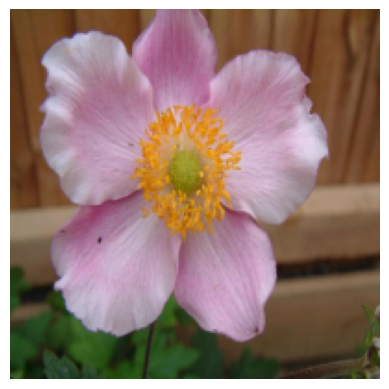

In [11]:
# plt.subplot(10, 2, 5)
for i in range(20):
    plt.imshow(cv2.cvtColor(data_images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



In [12]:
import scipy.io
label_image = scipy.io.loadmat("/content/drive/MyDrive/Dataset/imagelabels.mat")

In [13]:
label_image['labels'].shape

(1, 8189)

In [14]:
label=label_image['labels'].reshape((-1,1))
label.shape

(8189, 1)

In [15]:
data_array = np.array(data_images)

In [16]:
data_array.shape

(4000, 200, 200, 3)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data_array, label[0:4000] , test_size=0.2, random_state=42)

In [18]:
X_train.shape

(3200, 200, 200, 3)

In [19]:
X_test.shape

(800, 200, 200, 3)

# **Data preprossing**

Normalize image pixel values.

In [20]:
X_train_normalized = X_train / 255.0
X_test_normalized=X_test/255.0

# **CNN**

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(102, activation='softmax'))  # 102 classes for flower classification

    return model

# Create an instance of the model
model = define_model()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

In [ ]:
cnn_results= model.fit(X_train_normalized,y_train,epochs=5,batch_size=64,validation_data=(X_test_normalized, y_test))

In [ ]:
plt.plot(cnn_results.history['loss'])
plt.plot(cnn_results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

In [ ]:
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [ ]:
cnn_pred=CNN_model.predict(cnn_x_test)
cnn_pred[0:3]

In [ ]:
cnn_y_pred=argmax(cnn_pred,axis=1)
cnn_y_pred[0:3]

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(cnn_y_pred,y_test))
print(accuracy_score(cnn_y_pred,y_test))